# Kalorimetrie Laborversuch

Author: Leo Mensler

Datum: 13.12.2023

Gruppe: 79

## Forschungsfrage

Wie kann die Kalometriekonstante eines Kalorimeters bestimmt werden? Wie können die dazu benötigten Messdaten von Sensoren bestimmt, und nach den FAIR Daten Prinzipien verwendet werden? Wie können mithilfe des Kalorimeters die Wärmekapazitäten von verschiedenen Proben bestimmt werdenß Wie können Ergebisse anschaulich geplottet werden, unter Berücksichtigung von Messunsicherheiten (siehe Standartabweichung)?

## Versuchsaufbau und Durchführung

Versuchsaufbau: Kalorimeter (400ml Wasser mit Magnetrührer in einem Becherglas) & ein Sous Vide Garer der ein Wasserbad auf const. 80°C hlt. In diesem Wasserbad werden drei unterschiedliche Werkstoffproben mit der gleichen Geometrie erwärmt.

Versuchsdurchührung: 

Zunächst wird die Kalorimeterkonstante bestimmt. Dazu erwärmt man man das Kalorimeter mithilfe eines Tauchsieders. Die zugeführte elektrische Arbeit berechnet man durch Spannung*Strom*Zeit. Diese wird näherungsweise vollständig in Wärme umgewandelt und eignet sich daher zur Berechnung der Konstante. Die benötigte Start- und Endtemperatur bestimmt man über drei sich im Kalorimeter befindene Temperatursensoren.

Mithilfe dieser Kalometriekonstanten lassen sich die Wärmekapazitäten der Proben bestimmen. Dazu wird die auf 80°C erhitzte Probe in das Kalorimter getaucht und die Temperatur im Kalorimter so lange gemessen bis sie sich nicht mehr verändert. außerdem wird die Temperatur der Umgebung mit einem weiteren Sensor bestimmt. Aus den bestimmten Temperaturen: Temperatur_kalorimeter_start, Temperatur_kalorimeter_ende, Temperatur_probe_start reichen kann zusammen mit der Kalorimeterkonstante nun die Wärmekapazität bestimmt werden.

<img src="figures/calometry_laborversuch.jpg" width="800">


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

group_path =  "RawData"
datafile_path_const = "data/dataConstant/dataConstant.h5"

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, group_path)

# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0,1,2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_environment])
mean_data =[mean_std_calorimeter,mean_std_environment]

# Print the results

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


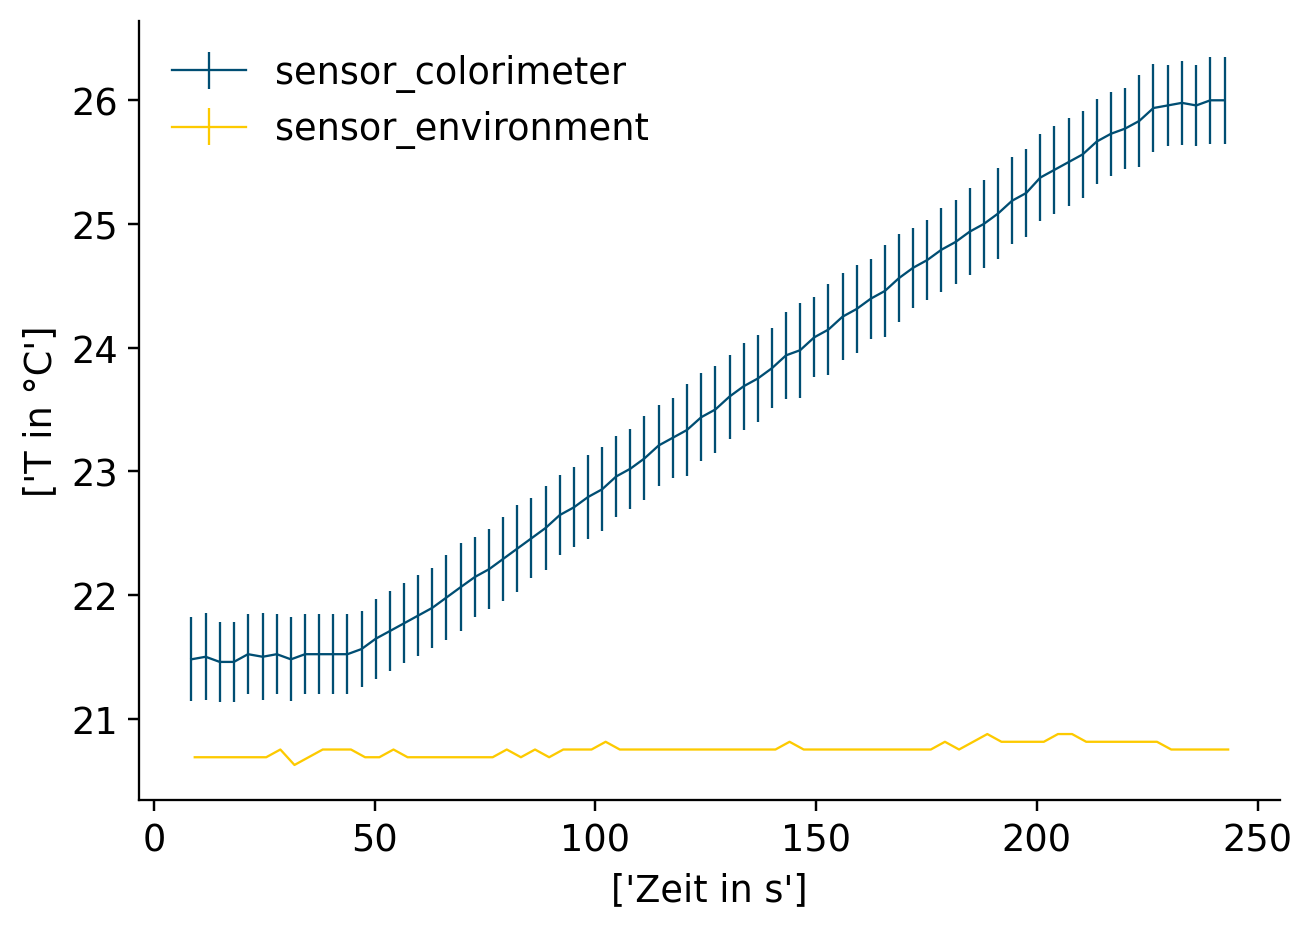

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time( mean_data, data_dict["timestamp"],["sensor_colorimeter","sensor_environment","sensor_heatingbath"],
                            ["Zeit in s"], 
                            ["T in °C"]
                           )
# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = m_json.get_json_entry("data/dataConstant","1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753", ["calorimeter","medium","mass","value"])
print(water_mass)

# DONE #

400


In [8]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

current = None
heat_time = None
voltage = None

with h5.File(datafile_path_const) as data:
        group = data[group_path]

        #Auslesen der hdf5 file
        #try & except Funktion nötig, da nicht alle subgruppen die Keys current, heat_time und voltage besitzen
        for subgroup in group:
            try:
                current = np.array(group[subgroup]["current"])
                heat_time = np.array(group[subgroup]["heat_time"])
                voltage = np.array(group[subgroup]["voltage"])
            except KeyError: 
                continue
        
                
print(current)
# DONE #

4.0


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#Nur die Temperaturwerte werden der funktion übergeben, nicht auch noch die standartabweichungen.
temperature_end, temperature_start = utility.get_start_end_temperature(mean_std_calorimeter[0]) 
print(temperature_end, temperature_start)
# DONE #

25.952381 21.51488


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = None

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

print(calorimeter_const)


# DONE #

2028.168142327046


#### (Vii) Ergebnis

In [11]:
calorimeter_const

2028.168142327046

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/calometry_P006/calometry.h5"

# DONE #

In [42]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,group_path)

# DONE #

In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

#erstellen einer neuen Liste mit allen Temperaturdaten um leichter Plotten zu können
mean_data = [mean_std_calorimeter,mean_std_environment,mean_std_heater]

# DONE #

#### (iii) Daten ploten

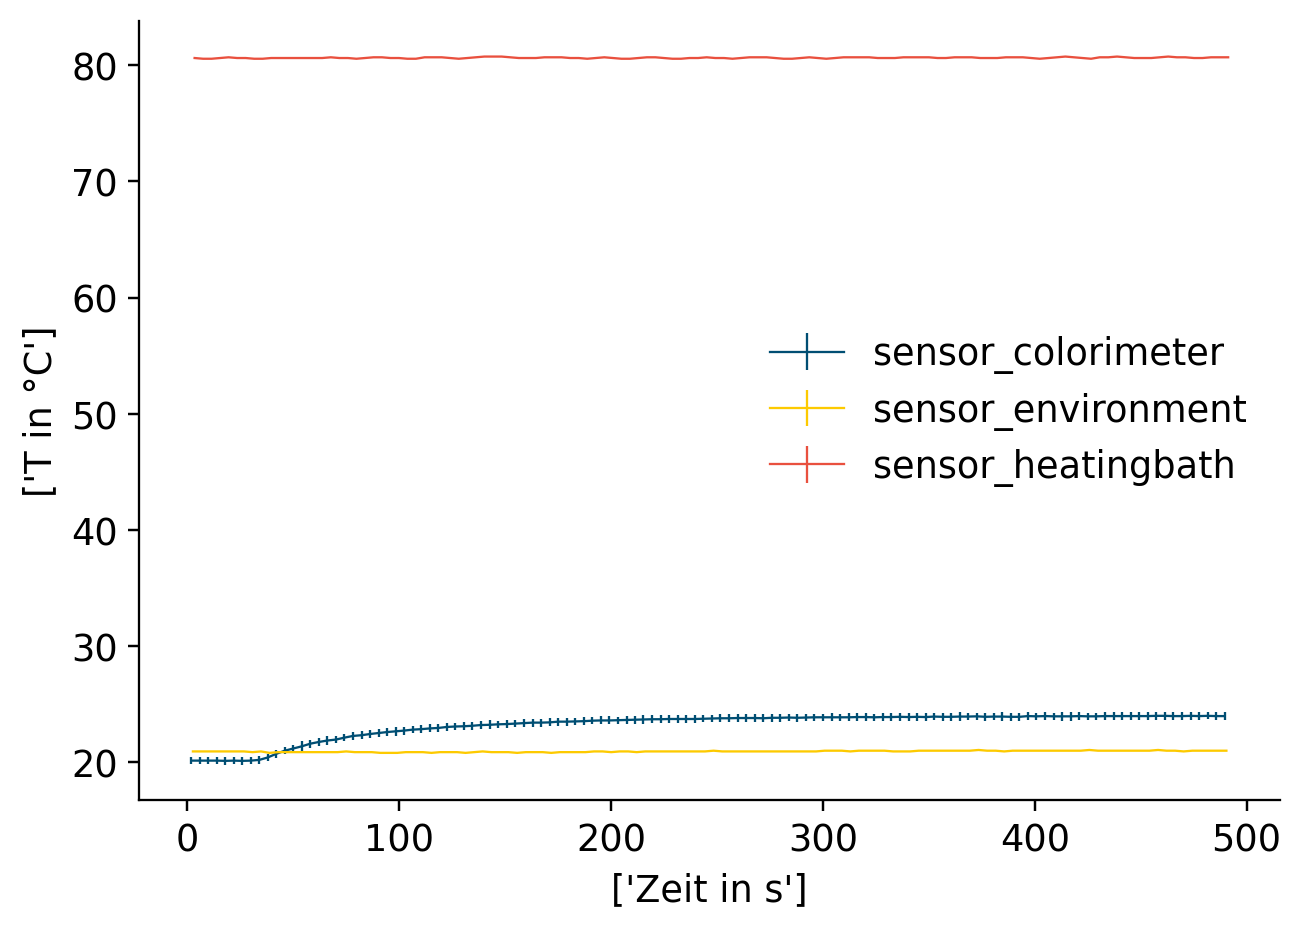

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time( mean_data, data_dict["timestamp"],["sensor_colorimeter","sensor_environment","sensor_heatingbath"],
                            ["Zeit in s"], 
                            ["T in °C"]
                           )

# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("data/calometry_P006","1ee57b31-ca65-62c8-bc60-327f1cbaf2f2", ["probe","mass","value"])
print(sample_mass)

# DONE #

110


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 
print(temperature_mix, temperature_start_water)
# DONE #

23.926168 20.148148


In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0])
print(temperature_start_sample)

# DONE #

80.64447


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water)/sample_mass*(temperature_start_sample-temperature_mix))
print(sample_heat_capa)
# DONE #

3950.925379278222


#### (Vii) Ergebnis

In [21]:
sample_heat_capa

3950.925379278222

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = datafile_path_prob1 = "data/calometry_P011/calometry_P011.h5"

# DONE #

In [23]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,group_path)

# DONE #

In [24]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

#erstellen einer neuen Liste mit allen Temperaturdaten um leichter Plotten zu können
mean_data = [mean_std_calorimeter,mean_std_environment,mean_std_heater]

# DONE #

#### (iii) Daten ploten

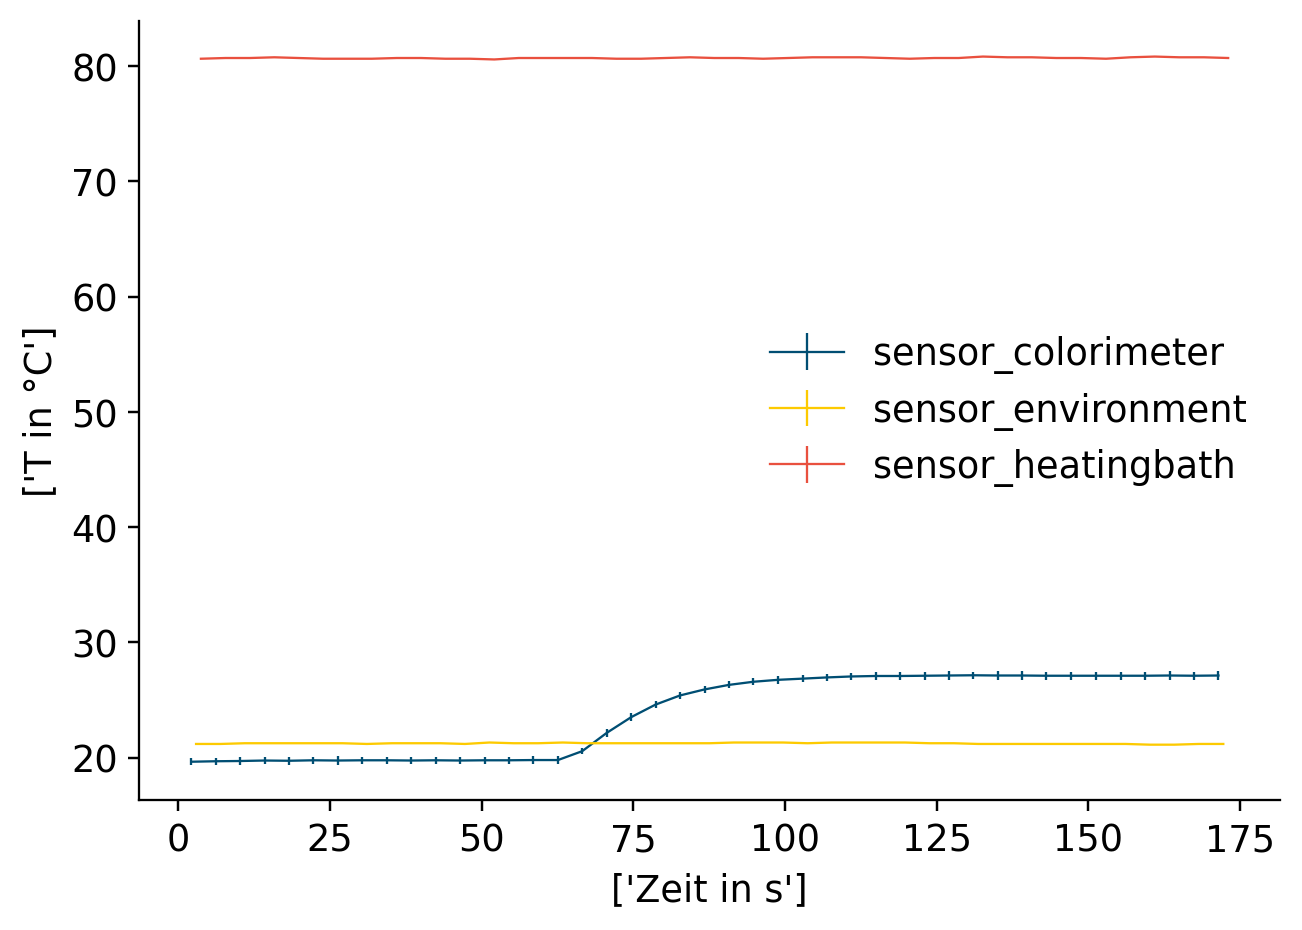

In [26]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time( mean_data, data_dict["timestamp"],["sensor_colorimeter","sensor_environment","sensor_heatingbath"],
                            ["Zeit in s"], 
                            ["T in °C"]
                           )

# DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("data/calometry_P011","1ee57b37-1b00-6b47-b00e-8332e0df15ea", ["probe","mass","value"])
print(sample_mass)
# DONE #

681


#### (v) Anfangs- und Endwert der Temperatur

In [28]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 
print(temperature_mix, temperature_start_water)

# DONE #

27.08449 19.7487


In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0])
print(temperature_start_sample)

# DONE #

80.68896


#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water)/sample_mass*(temperature_start_sample-temperature_mix))
print(sample_heat_capa)

# DONE #

1171.1291028779833


#### (Vii) Ergebnis

In [31]:
sample_heat_capa

1171.1291028779833

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/calorimetry_P023/calorimetry_P023.h5"

# DONE #

In [33]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,group_path)

# DONE #

In [34]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])
mean_data = [mean_std_calorimeter,mean_std_environment,mean_std_heater]

# DONE #

#### (iii) Daten ploten

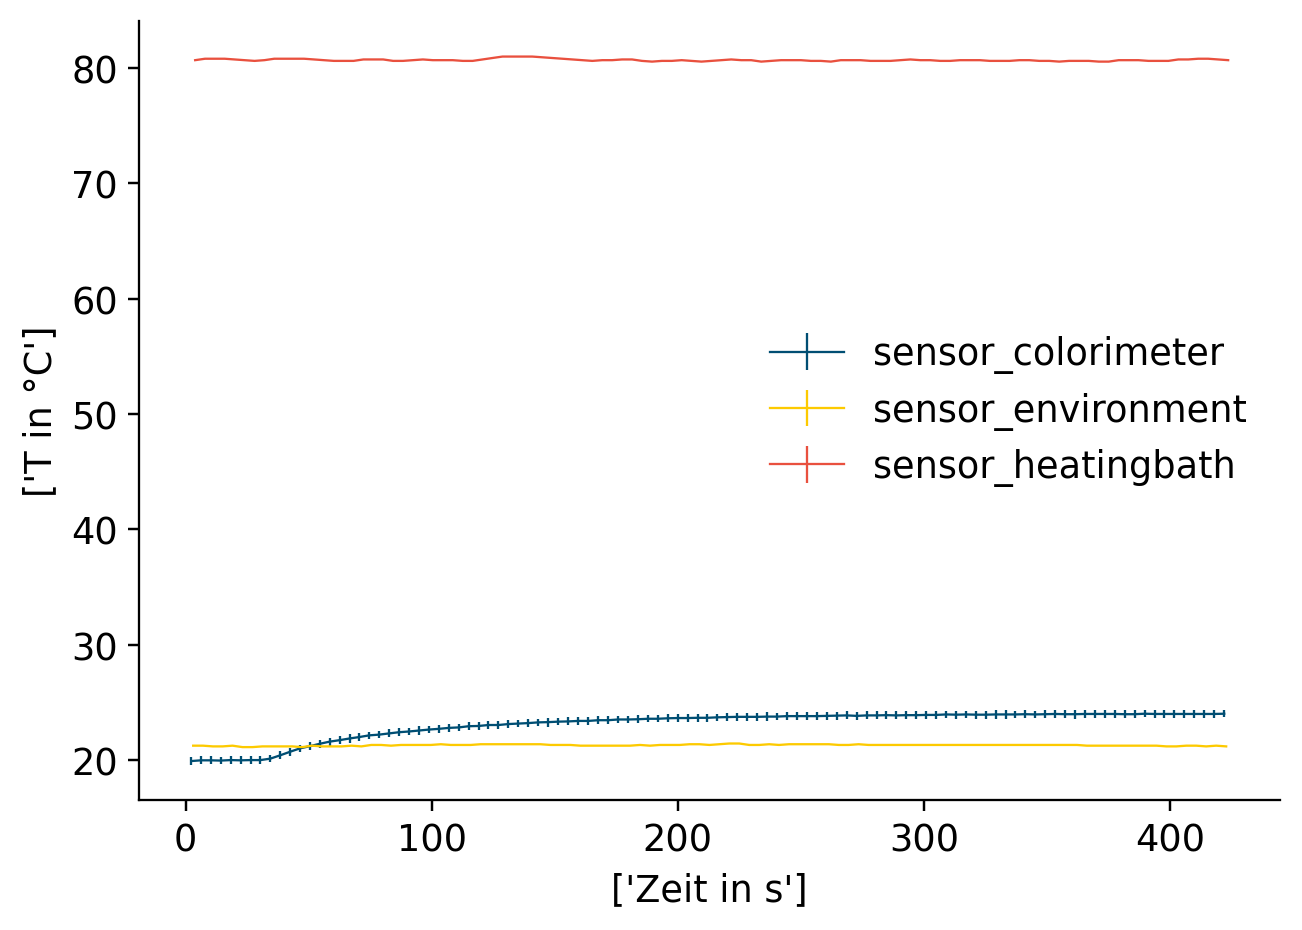

In [36]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time( mean_data, data_dict["timestamp"],["sensor_colorimeter","sensor_environment","sensor_heatingbath"],
                            ["Zeit in s"], 
                            ["T in °C"]
                           )

# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("data/calorimetry_P023","1ee7d443-5a29-6863-bb97-27e7763ee3fd", ["probe","mass","value"])
print(sample_mass)

# DONE #

83


#### (v) Anfangs- und Endwert der Temperatur

In [38]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 
print(temperature_mix, temperature_start_water)


# DONE #

23.951727 19.976562


In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0])
print(temperature_start_sample)


# DONE #

80.69821


#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water)/sample_mass*(temperature_start_sample-temperature_mix))
print(sample_heat_capa)

# DONE #

5512.13580931334


#### (Vii) Ergebnis

In [41]:
sample_heat_capa

5512.13580931334

## Diskussion
Insgesamt lässt sich festhalten dass die Ergebnisse erfreulich sind und mit den Erwartungen übereinstimmen.
Wie zu erwarten haben die beiden Kunststoffproben eine größere Wärmekapazität als die Metallprobe. Die transportierte Wassermenge sollte bei unserm Versuch keine Rolle gespielt habe, da sie im vergleich zur Wassermenge im Kalorimeter vernachlässigbar gering ist (1gr zu 400gr).



Mögliche weitere Fehlerquellen: 
- Tauchsieder sorgt nicht immer für idealen Wärmetransport im Kalorimter
- Messungenauigkeiten (einhalten von Zeitvorgaben beim Tauchsieder etc.)
- Abkühlen der Probe vor eintauchen in Kalorimeter


Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

## Fazit
Bei diesem Versuch konnte ich neue Erkenntnisse gewinnen. Ich hab das erste mal mit einem professionellen Messaufbau gearbeitet. Ich habe gelernt auf eine saubere Versuchsdurchführung zu achten. Ich habe erneut zu schätzen gelernt, wie wichtig es ist Daten nach den FAIR Prinzipen zu behandeln um später ohne Problem damit arbeiten zu können.
Ich konnte meine Kenntnisse in der Programmiersprache Python verbessern. 